In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist #import the input dataset
from tensorflow.keras.models import Sequential #import model to quickly set up a neural network
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten #some parameters to control bias and variance
from tensorflow.keras.optimizers import RMSprop

In [2]:
#Loading data set
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

In [4]:
from tensorflow.keras import backend as k

In [5]:
if k.image_data_format()=='channels_first':
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
    input_shape=(1,28,28)
else:
    train_images=mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
    test_images=mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
    input_shape=(28,28,1)
    
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255

In [6]:
#converting our train and test labels into one hot format
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


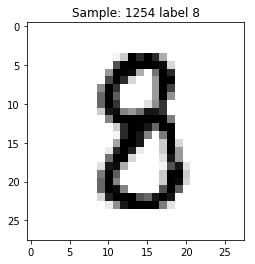

In [9]:
import matplotlib.pyplot as plt
def display_sample(num):
    print(train_labels[num])
    label=train_labels[num].argmax(axis=0)
    image=train_images[num].reshape([28,28])
    plt.title('Sample: %d label %d' %(num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1254)

In [13]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

#64 3x3 kernals
model.add(Conv2D(64,(3,3),activation='relu'))

#reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2,2)))

#dropout to avoid overfitting
model.add(Dropout(0.25))

#flatten the results to one dimension for passing the results to another layer
model.add(Flatten())

#a hidden layer to learn with
model.add(Dense(128,activation='relu'))

#add another dropout
model.add(Dropout(0.5))

#final categorization from 0-9 with
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history=model.fit(train_images,train_labels,batch_size=32,epochs=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 309s - loss: 0.1821 - acc: 0.9452 - val_loss: 0.0430 - val_acc: 0.9859
Epoch 2/10
 - 308s - loss: 0.0752 - acc: 0.9778 - val_loss: 0.0425 - val_acc: 0.9849
Epoch 3/10
 - 309s - loss: 0.0576 - acc: 0.9828 - val_loss: 0.0314 - val_acc: 0.9894
Epoch 4/10
 - 303s - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0283 - val_acc: 0.9915
Epoch 5/10
 - 303s - loss: 0.0403 - acc: 0.9879 - val_loss: 0.0273 - val_acc: 0.9919
Epoch 6/10
 - 307s - loss: 0.0334 - acc: 0.9892 - val_loss: 0.0284 - val_acc: 0.9919
Epoch 7/10
 - 305s - loss: 0.0293 - acc: 0.9905 - val_loss: 0.0308 - val_acc: 0.9905
Epoch 8/10
 - 303s - loss: 0.0276 - acc: 0.9913 - val_loss: 0.0297 - val_acc: 0.9920
Epoch 9/10
 - 303s - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0290 - val_acc: 0.9922
Epoch 10/10
 - 303s - loss: 0.0232 - acc: 0.9926 - val_loss: 0.0303 - val_acc: 0.9922


In [17]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('test loss',score[0])
print('test accuracy',score[1])

test loss 0.03025356593312763
test accuracy 0.9922


In [18]:
for x in range(1000):
    test_image=test_images[x,:].reshape(1,784)
    predicted_cat=model.predict(test_image).argmax()
    label=test_labels[x].argmax()
    if(predicted_cat !=label):
        plt.title('prediction %d label %d' %(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()

ValueError: Error when checking input: expected conv2d_4_input to have 4 dimensions, but got array with shape (1, 784)